In [208]:
# Loading Libraries
import pandas as pd                    # data analysis
import numpy as np                     # scientific calculations
import seaborn as sns                  # Statistical process
import matplotlib.pyplot as plt        # plotting
import statsmodels.api as sm

In [210]:
df = pd.read_csv(r'C:\Users\sandeep\Desktop\FTN\ML-PROJECTS\Customer Churn.csv')

In [212]:
df.head(100)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19,0,19,2,6453,144,90,44,2,2,1,25,701.865,0
96,15,0,17,1,8993,174,78,42,5,1,1,55,254.505,0
97,11,0,18,4,2913,48,36,21,3,1,1,30,262.440,0
98,5,0,11,2,4450,43,220,12,3,1,1,30,1059.720,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [22]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [24]:
value_count = df['Churn'].value_counts()
print("Count the observation of Churn:")
print(value_count)

Count the observation of Churn:
Churn
0    2655
1     495
Name: count, dtype: int64


In [26]:
df.dropna(inplace=True)

In [28]:
data = pd.get_dummies(df, drop_first=True, dtype=float)

In [30]:
# Defining Independent and dependent variables
x = df.drop('Churn', axis=1)
y = df.Churn

In [32]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=4)

In [34]:
# Using statsmodels for detailed model summary

x_train_sm = sm.add_constant(x_train)
logit_model = sm.Logit(y_train, x_train_sm)
result = logit_model.fit()

# Summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.219879
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2205
Model:                          Logit   Df Residuals:                     2191
Method:                           MLE   Df Model:                           13
Date:                Fri, 28 Mar 2025   Pseudo R-squ.:                  0.4801
Time:                        10:33:39   Log-Likelihood:                -484.83
converged:                       True   LL-Null:                       -932.51
Covariance Type:            nonrobust   LLR p-value:                5.064e-183
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.6424      0.918     -2.879      0.004      -4.441   

In [36]:
y_pred = result.predict(sm.add_constant(x_test))

y_pred

573     0.000954
2954    0.017423
1049    0.921025
2788    0.007048
1941    0.328671
          ...   
2278    0.402884
1208    0.009498
2756    0.003324
2952    0.000799
1152    0.002117
Length: 945, dtype: float64

In [38]:
y_pred_binary = (y_pred >= 0.5).astype(int)
y_pred_binary

573     0
2954    0
1049    1
2788    0
1941    0
       ..
2278    0
1208    0
2756    0
2952    0
1152    0
Length: 945, dtype: int32

In [40]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_binary)

array([[767,  14],
       [ 88,  76]], dtype=int64)

In [42]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_binary)

0.8920634920634921

AUC: 0.94


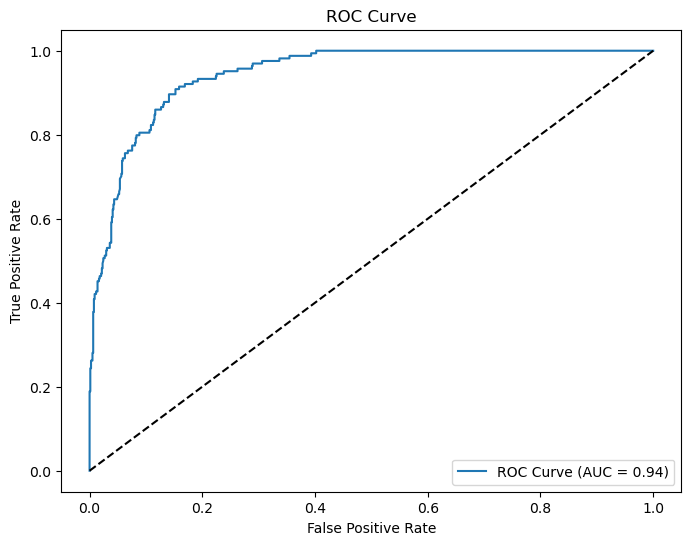

In [59]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
#y_prob = logistic_regression.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc:.2f}')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [201]:
#Creating XGboost model 
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [214]:
# Separate features and target variable
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [234]:
X.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805


In [236]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [238]:
# Initialize and train XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

C:\Users\sandeep\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:38:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [240]:
# Predictions
y_pred = xgb_model.predict(X_test)

In [242]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [244]:
accuracy

0.9634920634920635

In [246]:
conf_matrix

array([[519,  12],
       [ 11,  88]], dtype=int64)

In [248]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98       531\n           1       0.88      0.89      0.88        99\n\n    accuracy                           0.96       630\n   macro avg       0.93      0.93      0.93       630\nweighted avg       0.96      0.96      0.96       630\n'